<a href="https://github.com/parthemohan/COLAB/HumAIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from google.colab import files
import json

data =pd.read_json(path_or_buf="https://raw.githubusercontent.com/parthemohan/COLAB/master/Indian_Number_plates.json",lines=True)
dataframe =pd.DataFrame(data)
pd.options.display.max_colwidth = 1000#for whole view
dataframe.head()

,annotation,content,extras
0,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251}, {'x': 0.8684863523573201, 'y': 0.688841201716738}], 'imageWidth': 806, 'imageHeight': 466}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg,NaN
1,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.16194331983805602, 'y': 0.850779510022271}, {'x': 0.582995951417004, 'y': 1}], 'imageWidth': 494, 'imageHeight': 449}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg,NaN
2,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.082, 'y': 0.697452229299363}, {'x': 0.23, 'y': 0.8280254777070061}], 'imageWidth': 500, 'imageHeight': 314}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg,NaN
3,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.434, 'y': 0.667377398720682}, {'x': 0.718, 'y': 0.7654584221748401}], 'imageWidth': 500, 'imageHeight': 469}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/52b45060-9645-47c7-882d-b69a5bf07eff___1006372d1351343820-my-new-maruti-swift-zxi-21102012241.jpg.jpeg,NaN
4,"[{'label': ['number_plate'], 'notes': '', 'points': [{'x': 0.20879120879120802, 'y': 0.39076376554174}, {'x': 0.865134865134865, 'y': 0.9840142095914741}], 'imageWidth': 1001, 'imageHeight': 563}]",http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/5d08ee4a-d8e7-4fda-8959-21f263f62c25___100923d1368191518-custom-number-plates-embossedplates1.jpg.jpeg,NaN


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,804 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

In [0]:
import pytesseract
import shutil
import os
import random
import requests
from pandas.io.json import json_normalize 
from pandas.io.json import build_table_schema 
import io
try:
 from PIL import Image
except ImportError:
 import Image

In [0]:
X=dataframe['content']
Y=dataframe['annotation']

df = pd.DataFrame(Y[230])
#Y1=df['points']
Y1=df[['imageHeight','imageWidth']]
Y2=df['points']
daf=pd.DataFrame(Y2[0])
a=daf.iloc[0]['x']
b=daf.iloc[0]['y']
c=daf.iloc[1]['x']
d=daf.iloc[1]['y']
a*=Y1.iloc[0]['imageWidth']
c*=Y1.iloc[0]['imageWidth']
b*=Y1.iloc[0]['imageHeight']
d*=Y1.iloc[0]['imageHeight']

#daf.loc[:,'x']*=
#daf
#pd.read_json(json.loads(str(Y[0]))['label'])
#cdaa=json.dumps(Y)
#res = json_normalize(s,'imageHeight')

In [6]:
X[230]

'http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/9f7c7dce-f9c9-4c95-a053-8f16e6e99466___new_new-maruti-alto-k10-2_625x300_41414071192.jpg.jpeg'

In [7]:
print(a,b,c,d)

140.0 148.99999999999983 323.99999999999983 219.99999999999983


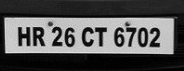

In [8]:
response = requests.get("http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/9f7c7dce-f9c9-4c95-a053-8f16e6e99466___new_new-maruti-alto-k10-2_625x300_41414071192.jpg.jpeg")
img = Image.open(io.BytesIO(response.content))
#print(width,height)
img2 = img.crop((a,b,c,d))
img3=img2.convert(mode='L', matrix=None, dither=None, palette=0, colors=256)
img3

In [9]:
text = pytesseract.image_to_string(img3)
print(text)



HR 26 CT 6702
